## Introduction to Scikit-LEarn (sklearn)

This notebok demostrates some of the most useful functions of the beautiful Scilit-learn librar

What we are going to cover:
    
0. An ed to end scikit-LEarn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algoruthm and use it to makepredictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trainedmodel
7. Putting it  together

## 0 An end to end scikit-Learn worflow

In [1]:
import numpy as np
np.random.seed(0)

In [2]:
# GETTING THE DATA READY
import pandas as pd
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create X(feature matrix)
X = heart_disease.drop ("target", axis = 1)

# create y (labes)
y = heart_disease["target"]

In [4]:
# 2.choose the right model and hyperparameter
# well be doing classficattion on our data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# well keep the default hyperparameter, the hyperparameter will be printed out
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. fit the model to the data
# we need to train our data on trianingset and test it on test set

from sklearn.model_selection import train_test_split
# this will split our data into trainingng and  test set
# the test set is setto 20%
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [6]:
# now we'll call our clssifcation model to fit our trainingset into it
clf.fit(X_train,y_train)

RandomForestClassifier()

In [7]:
# make aprediction, since we have fit our tainign set into it
#y_label = clf.predict(np.array[]) since we have alot of feature dataset
# we can be typing something that look like that into a numpy array
# that is why we have x_test.

In [8]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [9]:
# y prediction value of the test set
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [10]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

In [11]:
# 4.Evaluate the model
# Evaluate how well the model has done very well on the taining and test data

clf.score(X_train,y_train)

1.0

In [12]:
clf.score(X_test,y_test)

0.8524590163934426

In [13]:
 # we can use other metrics to check the accuracy of our model
    
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [14]:
print(confusion_matrix(y_test,y_preds))

[[22  5]
 [ 4 30]]


In [15]:
print(accuracy_score(y_test,y_preds))

0.8524590163934426


In [16]:
#.Improve a model
# try different type of n_estimators

np.random.seed(42)
for i in range (10,100,10):
    print(f"trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train,y_train)
    print(f"Model Accuracy on test set: {clf.score(X_test, y_test)* 100:.2f}%")
    print("---------------------------------")

trying model with 10 estimators...
Model Accuracy on test set: 81.97%
---------------------------------
trying model with 20 estimators...
Model Accuracy on test set: 80.33%
---------------------------------
trying model with 30 estimators...
Model Accuracy on test set: 81.97%
---------------------------------
trying model with 40 estimators...
Model Accuracy on test set: 85.25%
---------------------------------
trying model with 50 estimators...
Model Accuracy on test set: 90.16%
---------------------------------
trying model with 60 estimators...
Model Accuracy on test set: 83.61%
---------------------------------
trying model with 70 estimators...
Model Accuracy on test set: 83.61%
---------------------------------
trying model with 80 estimators...
Model Accuracy on test set: 88.52%
---------------------------------
trying model with 90 estimators...
Model Accuracy on test set: 86.89%
---------------------------------


In [17]:
# 6. save the model and load it
import pickle

pickle.dump(clf,open("random_forest_model_1.pkl", "wb"))

In [18]:
# load the model
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

0.8688524590163934

 ## 1. Getting our data ready to be used with machine Learning
    
    Three main thngs we hav to do:
        
1. Spllit the data into features and laabels (usingually (X and y))
2. Filling (also call imputing) or disregarding the missing values
3. Converting non-numerical values to numerical values( also called feature endcoding)

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
heart_disease.info()
#as we can see our data is perfetly okay, so well be working with another dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
## spliting the data into features and label ( X and )

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

## 1.1 Make Sure it'all numerical


In [22]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [23]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [24]:
car_sales[["Odometer (KM)","Doors","Price"]].astype(int)

,Odometer (KM),Doors,Price
0,35431,4,15323
1,192714,5,19943
2,84714,4,28343
3,154365,4,13434
4,181577,3,14043
...,...,...,...
995,35820,4,32042
996,155144,3,5716
997,66604,4,31570
998,215883,4,4001


In [25]:
len(car_sales) #the total row is 1,000

1000

In [26]:
#checking the missing values
car_sales.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [27]:
#split into X and y
X= car_sales.drop("Price", axis =1)
y = car_sales["Price"]

In [28]:
#split it into training and test set
#import the skleran algorithm
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
#Build the machine learning model
#using Random Forest Regresion model
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [31]:
# Using Skleanr for one hot encoder
# we need to do some encoding, to convert our strings to numerical values
# import the preprocessing method from sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#let declare our categorical data
cate_features = ["Make","Colour","Doors"]

#Why add doors,door is not a string but its categorical, it has three categories
#use car_sales["doors"].count() to check

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,
                                  cate_features)],
                               remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [33]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [34]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [35]:
# using pandas for one hot enconder

dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies["Odometer (KM)"] = car_sales["Odometer (KM)"]
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Odometer (KM)
0,4,0,1,0,0,0,0,0,0,1,35431
1,5,1,0,0,0,0,1,0,0,0,192714
2,4,0,1,0,0,0,0,0,0,1,84714
3,4,0,0,0,1,0,0,0,0,1,154365
4,3,0,0,1,0,0,1,0,0,0,181577
...,...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0,35820
996,3,0,0,1,0,0,0,0,0,1,155144
997,4,0,0,1,0,0,1,0,0,0,66604
998,4,0,1,0,0,0,0,0,0,1,215883


In [36]:
#Let's try to refit the model
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(dummies,y,test_size= 0.2)

reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.3219620934706694

## 1.2 What if there were missing values
1. filthem with somevalue (also known as imputation)
2. Remove thesample with missing data alltogther

In [37]:
car_sales_missing = pd.read_csv("car-sales-extended-missing.csv")

In [38]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [39]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [40]:
car_sales_missing.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
#Create X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [42]:
#Let's try and convert our data to numbers
#Turn thr categoies into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features =["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot", one_hot,
                                  categorical_features)],
                               remainder = "passthrough")
transformed_X =  transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [43]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [44]:
#1 fill missing value using pandas

car_sales_missing["Make"].fillna("missing", inplace =  True)

car_sales_missing["Colour"].fillna("missing", inplace =  True)

#Use h emost common door category fill it, most car has 4 doors

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

car_sales_missing["Doors"].fillna(4, inplace =  True)

In [45]:
car_sales_missing.isnull().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [46]:
# its difficult to create a prediction model 
# Remove Rows with missing price value

car_sales_missing.dropna(inplace = True)

In [47]:
len(car_sales_missing)

950

In [48]:
X = car_sales_missing.drop("Price", axis =1)
y = car_sales_missing["Price"]

In [49]:
#Let's try and convert our data to numbers
#Turn thr categoies into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features =["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot", one_hot,
                                  categorical_features)],
                               remainder = "passthrough")
transformed_X =  transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## 1.2 using Sklearn for filling missing values

In [50]:
car_sales_missing = pd.read_csv("car-sales-extended-missing.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [51]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
#drop the row wih no label value
car_sales_missing.dropna(subset =["Price"],inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [53]:
# split into X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [54]:
i# Filling msising valuesusing sckit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# Fill categorical values with missing & numerical values with means
cat_imputer = SimpleImputer(strategy ="constant",fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")



# Define Columns
cat_features = ["Make","Colour"]
door_feature =["Doors"]
num_features = ["Odometer (KM)"]


#create an imputer (somehing that fil the missing data)
imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features),
                           ("door_imputer", door_imputer, door_feature),
                           ("num_imputer", num_imputer, num_features)
                           ])
#Transform the data

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [55]:
car_sales_filled = pd.DataFrame(filled_X, 
                               columns = ["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [56]:
car_sales_filled.isnull().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [57]:
#Let's try and convert our data to numbers
#Turn thr categoies into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_features =["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot", one_hot,
                                  categorical_features)],
                               remainder = "passthrough")
transformed_X =  transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train,X_test, y_train,y_test = train_test_split(transformed_X,
                                                 y, test_size =0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.10486008486143839

## 2. Choosing the right Estimator/Algorithm for our model

scikit-Learn uses estimator as another term for machne leaning model or algorithm

* Classification - Predicting whether a sample is one another
* Regression - predicting a number

step1- Check the scikit-Learning machine learning map

In [59]:
## 2.1 picking a machine LEarning model for a regression dataset
# imporrt data from sklearn
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [60]:
boston_df = pd.DataFrame(boston["data"], columns =boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [61]:
#After Loooking through the Sklern Linear model mapin the documentation to select best model

#Lets try Ridge Regression model

from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

#create data
X= boston_df.drop("target", axis = 1)
y = boston_df["target"]

#splt data intraining and test set
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size= 0.2)

# Instiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

#check the score of the model on the test dataset

model.score(X_test,y_test)

0.6662221670168522

In [62]:
# Let try Ensemble model
# we decided to go for Random classifier


from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#create data
X= boston_df.drop("target", axis = 1)
y = boston_df["target"]

#splt data intraining and test set
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size= 0.2)

# Instiate Ridge model
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)

#check the score of the model on the test dataset

rf.score(X_test,y_test)

0.8654448653350507

## 2.2 Chossing Model for a classification problem

In [63]:
# Do this using the heart_disease data
heart_disease =pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
#split the data into features and label
X= heart_disease.iloc[:,:13]
y = heart_disease['target']

In [65]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Consulting the map and it says to try LinearSVM

In [66]:

# splitint the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

np.random.seed(42)

from sklearn.svm import LinearSVC
cls = LinearSVC(max_iter=1000)

cls.fit(X_train,y_train)
cls.score(X_test,y_test)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5245901639344263

In [67]:
#using ensemble model (RandomForestClassifier)
np.random.seed(42)

# splitint the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#import yourmodel and fit it to the train datasets
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8524590163934426

## 3.1 Fitting the model to the data and use it to make prediction

The  fit method takes in two parameter the feature train & label train, itlearn the pattern in the taining setand use it to predict. 

In [68]:
cls = LinearSVC(max_iter = 1000).fit(X_train,y_train)
cls.score(X_test,y_test)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8852459016393442

## 3.2 Making Predictions using Machine learning models

2 ways to make predictions:

    1.predict()
    2.predict_proba()

In [69]:
#using ensemble model (RandomForestClassifier)
np.random.seed(42)

#split the data into features and label
X= heart_disease.iloc[:,:13]
y = heart_disease['target']

# splitint the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#import yourmodel and fit it to the train datasets
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8524590163934426

In [70]:
# use the training model to make apredictions
# Lets make a prediction on the X_test and compare it to the 

y_preds = model.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
# let's compare this with the x_test dataset
np.array(y_test) # thenp.srrsy id judt to give it same shape as y_preds

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [72]:
# predicting with predict_proba()
# it gives the propabiltiy of the estimation 

model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [73]:
# Let'predict on the same data
# compare the output ofthiswith the predict_probaoutput to understand the probabiity
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

### Making prediction using Regression

In [74]:
#using the boston_df dataset from sklearn

boston_df = pd.DataFrame(boston["data"], columns =boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [75]:

from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#create data
X= boston_df.drop("target", axis = 1)
y = boston_df["target"]

#splt data intraining and test set
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size= 0.2)

# Instiate Ridge model
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)

#check the score of the model on the test dataset

rf.score(X_test,y_test)

0.8654448653350507

In [76]:
y_preds = rf.predict(X_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [77]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [78]:
# Compare the predition to the truth label
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.136382352941176

## 4.2 Evaluating a model using the scoring parameter

In [79]:
#using ensemble model (RandomForestClassifier)
np.random.seed(42)

#split the data into features and label
X= heart_disease.iloc[:,:13]
y = heart_disease['target']

# splitint the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

#import yourmodel and fit it to the train datasets
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train,y_train)
#cross validation scroeis a scoring paramter use to evvaluate our model
from sklearn.model_selection import cross_val_score # import cross validation

In [80]:
# using the noramal score function to check the score accuary
model.score(X_test,y_test)

0.8524590163934426

In [81]:
# the cross_val_score returns an array of number
# using the cross validation method to score our model

cross_val_score(model,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [82]:
#cv is the k-fold parameer(number of fold)
cross_val_score(model,X,y,cv = 10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [83]:
np.random.seed(42)

# Single training and test splitcross
model_single_score= model.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score
model_cross_val_score =np.mean(cross_val_score(model,X,y,cv=5))

# compare the two

model_single_score,model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [84]:
# Scoring parameter set to None by defualt
cross_val_score(model,X,y, cv= 5, scoring = None)


array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## 4.2.1 Classifcation model evaluation metircs
    1. Accuracy 
    2. AreaUnderROC Curve
    3. Confusion matrix
    4. Classificaiton report
    
  **Accuracy**

In [85]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score =  cross_val_score(clf,x,y)

In [87]:
# the mean of the 
np.mean(cross_val_score)

0.8248087431693989

In [88]:
print(f'Heart Disease Classfiifer Cross Validated Accurary: {np.mean(cross_val_score)*100:.2f}%')

Heart Disease Classfiifer Cross Validated Accurary: 82.48%


**Area under the Receiver Operating Characterstics Curve(AUC/ROC)**

* Area under Curve (AUC)
* ROC Curve


ROC curves are a cmparism of a model's true postive rate (tpr) versus False postive rate(fpr)

* True stiive = model predict 1 when the truth is 1
* Fale positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1

In [89]:
np.random.seed()
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier().fit(x_train,y_train)

from sklearn.metrics import roc_curve

#make predcition with probabilty

ypreds = clf.predict_proba(X_test)

ypreds[:10], len(y_preds)

(array([[0.94, 0.06],
        [0.83, 0.17],
        [0.19, 0.81],
        [0.94, 0.06],
        [0.1 , 0.9 ],
        [0.02, 0.98],
        [0.13, 0.87],
        [1.  , 0.  ],
        [0.98, 0.02],
        [0.17, 0.83]]),
 102)

In [90]:
y_probs_positive = ypreds[:,1]
y_probs_positive

array([0.06, 0.17, 0.81, 0.06, 0.9 , 0.98, 0.87, 0.  , 0.02, 0.83, 0.93,
       0.21, 0.97, 0.06, 0.96, 0.97, 1.  , 0.1 , 0.  , 0.04, 0.69, 0.  ,
       0.36, 0.77, 0.91, 0.26, 0.34, 0.87, 0.02, 0.9 , 0.  , 0.  , 0.01,
       0.81, 0.87, 0.04, 0.86, 0.9 , 0.87, 0.94, 0.95, 0.92, 0.92, 0.85,
       0.85, 0.12, 0.33, 0.99, 0.04, 0.  , 0.03, 0.1 , 0.91, 0.9 , 0.06,
       0.08, 0.13, 0.99, 0.04, 0.  , 0.08])

In [91]:
#calculate fpr, tprand threshold
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)



# Check the false postiitve rates
fpr

array([0.        , 0.03571429, 0.07142857, 0.07142857, 0.07142857,
       0.07142857, 0.14285714, 0.14285714, 0.17857143, 0.17857143,
       0.39285714, 0.42857143, 0.42857143, 0.46428571, 0.46428571,
       0.5       , 0.5       , 0.57142857, 0.57142857, 0.64285714,
       0.64285714, 0.67857143, 0.67857143, 0.78571429, 0.82142857,
       0.85714286, 0.92857143, 0.92857143, 1.        ])

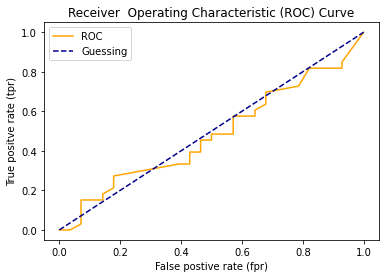

In [92]:
# The numbers above did not make much sense
# we to visualise roc to undertand it, but sklearn cannot visualise

# Creae a function for plotting ROC curves

import matplotlib.pyplot as plt


def plot_roc_curve(fpr,tpr):
    """
    Plot a ROC curve given the false postiitve rate (fpr) and 
    true positive rate(tpr of a model)
    
    """
    # plot roc cruve
    plt.plot(fpr,tpr,color= "orange",label= "ROC")
    
    #plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color = "darkblue",linestyle ="--", label = "Guessing")
    
    
    #Customize the plot
    plt.xlabel("False postive rate (fpr)")
    plt.ylabel("True positve rate (tpr)")
    plt.title("Receiver  Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [93]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.481060606060606

**Confusion Matrix**

A confusion matix is a quick way to compare the labels a model predicts and the actal lables it was supposed to predict.

In essence givng you an idea of where the data is getting confused

In [94]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[14, 14],
       [17, 16]], dtype=int64)

In [95]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames = ["Actual label"],
           colnames = ["Predcited Labels"])

Predcited Labels,0,1
Actual label,,
0,14,14
1,17,16


<AxesSubplot:>

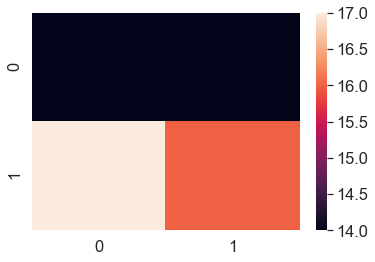

In [96]:
# make our confusion matrix more visuial with sean borad heat map
import seaborn as sns

# setthe fon scale
sns.set(font_scale = 1.5)

conf_mat = confusion_matrix(y_test,y_preds)

#plot it using Seasborn
sns.heatmap(conf_mat)

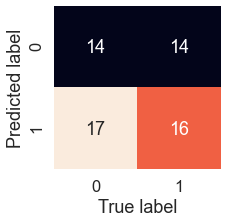

In [97]:
def plot_conf_mat(conf_mat):
   
    """
    Plots aconfusion matrix using seaborn's heatmap()
    
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax= sns.heatmap(conf_mat,
                   annot = True,# Annotate the  bboxeswith conf_mat info
                   cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
conf_mat = confusion_matrix(y_test,y_preds)    
plot_conf_mat(conf_mat)

**Classification report**

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.45      0.50      0.47        28
           1       0.53      0.48      0.51        33

    accuracy                           0.49        61
   macro avg       0.49      0.49      0.49        61
weighted avg       0.50      0.49      0.49        61



## Regresion model evaluation metrics

model evaluation 

**R^2**
what R-squared does: Compares your models to the mean of the targets. Values can range from negative infinity (avery poor model) to 1. For example,if all your model does is predict the mean of the targets,it'sR^2 value would be 0. And if your model perfectly predicts arange of numbers it's R^2 value would be 0. And if your model predicts a range ofnumber it's R^2 valu will be 1.

this dosent tell us how far our prediction is from th actual value (y_true),it only tells us the performance of the model

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
 
#prepare ypur data
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# split into training and test test
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size = 0.2)

# Instiate your model
reg = RandomForestRegressor()

#fit your model

reg.fit(X_train,y_train);

In [100]:
# the default scoreof a regresion mdelis the Rsquared value
reg.score(X_test,y_test)

0.8654448653350507

In [101]:
from sklearn.metrics import r2_score

#filllan array with y_test mean

y_test_mean= np.full(len(y_test),y_test.mean())
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [102]:
y_test.mean()

21.488235294117644

In [103]:
r2_score(y_test,y_test_mean)

0.0

In [104]:
r2_score(y_test,y_test)

1.0

**Mean Absolute error (MAE)**
AE is the average of the absolute differences between predictions and actual values. IT gives you an idea of how wrong your models is

In [105]:
#  Mean absolute error
from sklearn.metrics import mean_absolute_error
y_preds = reg.predict(X_test)
mae =  mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [108]:
# Let visualiaze and compare in a pandas dataframe
df = pd.DataFrame(data ={"actual values":y_test,"Predicted values":y_preds})
df["Differences"] = df["actual values"] - df["Predicted values"]
df.head()

,actual values,Predicted values,Differences
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,-3.159
72,22.8,23.460,-0.660
452,16.1,16.893,-0.793


**Mean Squared Error**


In [113]:
#mean squared error
from sklearn.metrics import mean_squared_error

y_preds = reg.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [120]:
#Calclulate MSE by hand
squared = np.square(df["Differences"])
squared.mean()

9.867437068627442

### 4.23 Finally using the 'Scoring' parameter 

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


np.random.seed(42)

X = heart_disease.drop("target" ,axis =1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [128]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y, cv =5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [132]:
#Cross_validated Accuracy

print(f'The cross-valiared acuracy is :{np.mean(cv_acc)*100:.2f}%')

The cross-valiared acuracy is :82.48%


In [133]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y, cv =5, scoring = "accuracy")
print(f'The cross-valiared acuracy is :{np.mean(cv_acc)*100:.2f}%')

The cross-valiared acuracy is :82.48%


In [135]:
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y, cv =5, scoring = "precision")
print(f'The cross-valiared acuracy is :{np.mean(cv_precision)*100:.2f}%')

The cross-valiared acuracy is :83.30%
